In [89]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
a0 = pd.read_csv('train.csv')
# a0.shape
assets = pd.read_csv('asset_details.csv') 
assets 

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [90]:
b0 = a0['Open']
c0 = a0['High']
d0 = a0['Low']
e0 = a0['Close']
f0 = a0['Volume']
g0= a0['VWAP']
h0 = a0['Asset_ID']
i0 = a0['timestamp']
id_o= pd.DataFrame(h0).join(b0) 
id_o_v = id_o.join(f0)
id_o_v_t = id_o_v.join(i0)

In [91]:
bnb = a0[a0['Asset_ID'] == 0]
bnb_range = bnb.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# bnb.head()

btc = a0[a0['Asset_ID'] == 1]
btc_range = btc.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# btc.head()

btcash = a0[a0['Asset_ID'] == 2]
btcash_range = btcash.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# btcash.head()

cardano = a0[a0['Asset_ID'] == 3]
cardano_range = cardano.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# cardano.head()

doge = a0[a0['Asset_ID'] == 4]
doge_range = doge.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# doge.head()

eos = a0[a0['Asset_ID'] == 5]
eos_range = eos.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# eos.head()

eth = a0[a0['Asset_ID'] == 6]
eth_range = eth.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# eth.head()

etc = a0[a0['Asset_ID'] == 7]
etc_range = etc.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# etc.head()

iota = a0[a0['Asset_ID'] == 8]
iota_range = iota.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# iota.head()

ltc = a0[a0['Asset_ID'] == 9]
ltc_range = ltc.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# ltc.head()

mkr = a0[a0['Asset_ID'] == 10]
mkr_range = mkr.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# mkr.head()

xmr = a0[a0['Asset_ID'] == 11]
xmr_range = xmr.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# xmr.head()

xlm = a0[a0['Asset_ID'] == 12]
xlm_range = xlm.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
# xlm_range
    
trx = a0[a0['Asset_ID'] == 13]
trx_range = trx.iloc[-500:]
 # Since we cannot plot the entire btc, so selecting the latest 500 points.
# trx_range
# trx.shape
bnb_range

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2416230,1530163860,0.0,24.0,13.9261,13.9519,13.9003,13.9519,684.28,13.919792,-0.003391
2416241,1530163920,0.0,20.0,13.9544,13.9606,13.9265,13.9504,303.64,13.938854,-0.000158
2416252,1530163980,0.0,8.0,13.9300,13.9300,13.9265,13.9288,110.01,13.929604,0.000481
2416262,1530164040,0.0,4.0,13.9187,13.9501,13.9187,13.9199,61.30,13.948985,0.001027
2416273,1530164100,0.0,8.0,13.9220,13.9429,13.9220,13.9302,507.23,13.925228,0.000739
...,...,...,...,...,...,...,...,...,...,...
2421870,1530193560,0.0,10.0,14.6742,14.6797,14.6739,14.6785,1237.79,14.674448,0.014455
2421882,1530193620,0.0,19.0,14.6745,14.6745,14.6376,14.6592,2659.08,14.669023,0.014247
2421894,1530193680,0.0,8.0,14.6702,14.6702,14.6501,14.6700,156.37,14.669009,0.014254
2421905,1530193740,0.0,6.0,14.6700,14.6700,14.6699,14.6699,19.66,14.669993,0.014347


In [92]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
fig = go.Figure(data=[go.Candlestick(x=bnb_range.index, 
                                     open=bnb_range['Open'], 
                                     high=bnb_range['High'], 
                                     low=bnb_range['Low'], 
                                     close=bnb_range['Close'])])
print('Use the slider to Adjust and Zoom')
fig.show()

Use the slider to Adjust and Zoom


In [93]:
import numpy as np
avg=np.average(bnb_range['Open'])   
avg1=np.average(bnb_range['High']) 
avg2=np.average(bnb_range['Low'])
avg3=np.average(bnb_range['Close'])
print('avg OPEN for bnb: {}, avg High for bnb: {}, avg LOW for bnb: {}, avg CLOSE for bnb: {}\n\n'.format(avg,avg1,avg2,avg3))   


avg OPEN for bnb: 14.3228118, avg High for bnb: 14.341101799999999, avg LOW for bnb: 14.304793599999998, avg CLOSE for bnb: 14.324455599999999




In [94]:
import plotly.express as px
data = dict(
    number=[bnb_range['Open'],bnb_range['High'],bnb_range['Low'],bnb_range['Close']],
    stage=[ "Open", "High", "Low", "Close"])
fig = px.funnel(bnb_range, x=bnb_range['Volume'], y=bnb_range['Open'])
fig.show()

In [95]:
data = dict(
    number=[bnb_range['Open'],bnb_range['High'],bnb_range['Low'],bnb_range['Close']],
    stage=[ "Open", "High", "Low", "Close"])
fig = px.funnel(bnb_range, x=bnb_range['timestamp'], y=bnb_range['Open'])
fig.show()

In [96]:
data = dict(
    number=[bnb_range['Open'],bnb_range['High'],bnb_range['Low'],bnb_range['Close'],bnb_range['Volume']],
    stage=[ "Open", "High", "Low", "Close",'volume'])
fig = px.funnel(bnb_range, x=bnb_range['timestamp'], y=bnb_range['Volume'])
fig.show()
fig.write_html("bnb_signal.html")

In [97]:
background = bnb_range['Volume']
x = bnb_range['timestamp']
y = bnb_range['Open']
x_df = pd.DataFrame(x)  
y_df = pd.DataFrame(y) 
background_df = pd.DataFrame(background) 
x = x_df 
y = y_df 
background = background_df

In [98]:
extract = x.join(background) 
extract = extract.join(y)
extract 
data = extract.to_csv('data/extractionbnb.csv') 
data = pd.read_csv('data/extractionbnb.csv')
data = data.drop(['Unnamed: 0'],axis=1) 
data 
from sklearn.decomposition import PCA, FastICA
X= data['timestamp'] 
y = data['Open'] 
background = data['Volume']

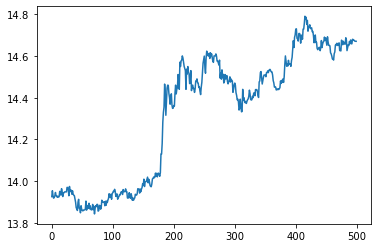

In [99]:
# # plt.scatter(x,y)
# plt.hist2d(y,background) 
plt.plot(y) 
# plt.plot(x)

(array([[30., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [48.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [22., 28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 24.,  5.,  3.,  2.,  9.,  7.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2., 28., 20.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 20., 22.,  8.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 27., 19.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 20., 25.,  4.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23., 27.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 46.,  0.]]),
 array([1.53016386e+09, 1.53016685e+09, 1.53016985e+09, 1.53017284e+09,
        1.53017584e+09, 1.53017883e+09, 1.53018182e+09, 1.53018482e+09,
        1.53018781e+09, 1.53019081e+09, 1.53019380e+09]),
 array([13.8434 , 13.93805, 14.0327 , 14.12735, 14.222  , 14.31665,
        14.4113 , 14.50595, 14.6006 , 14.69525, 14.7899 ]),
 <matplotlib.collections.QuadMesh at 0x22a439ea088>)

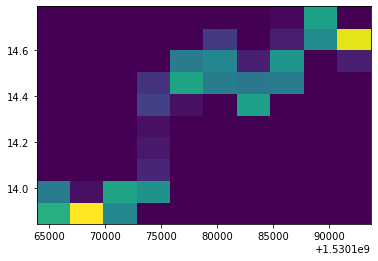

In [100]:
plt.hist2d(data['timestamp'],data['Open']) 


(array([[49.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [38.,  5.,  1.,  4.,  1.,  0.,  0.,  0.,  1.,  0.],
        [31., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [45.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [44.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [45.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [43.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [49.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.53016386e+09, 1.53016685e+09, 1.53016985e+09, 1.53017284e+09,
        1.53017584e+09, 1.53017883e+09, 1.53018182e+09, 1.53018482e+09,
        1.53018781e+09, 1.53019081e+09, 1.53019380e+09]),
 array([1.2100000e+00, 4.3436690e+03, 8.6861280e+03, 1.3028587e+04,
        1.7371046e+04, 2.1713505e+04, 2.6055964e+04, 3.0398423e+04,
        3.4740882e+04, 3.9083341e+04, 4.3425800e+04]),
 <mat

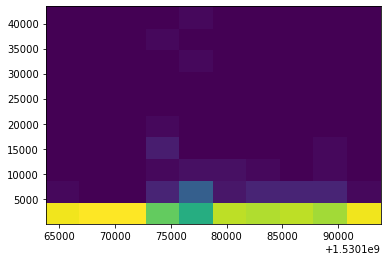

In [101]:
plt.hist2d(data['timestamp'],data['Volume']) 

Populating the interactive namespace from numpy and matplotlib


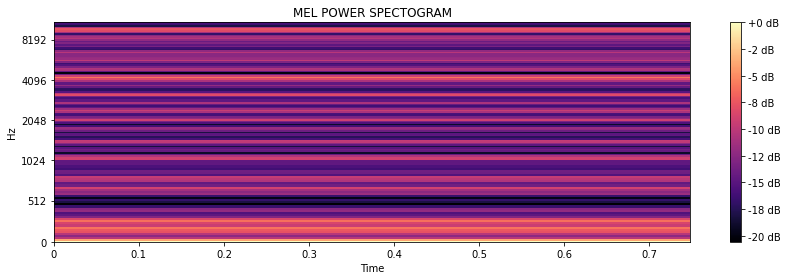

In [102]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import librosa
import keras
import librosa.display
%pylab inline
import glob
data = np.squeeze(np.asarray(np.matrix(data)[:,1])) 
sam_rate = np.squeeze(np.asarray(np.matrix(data)[:,0])) 
D = np.abs(librosa.stft(data))**2
S = librosa.feature.melspectrogram(data,sr=sam_rate,S=D,n_mels=128)
log_S1 = librosa.power_to_db(S,ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S1,sr=sam_rate,x_axis='time',y_axis='mel')
plt.title('MEL POWER SPECTOGRAM')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

### RECIEVING SIGNAL

In [103]:
librosa.get_duration(data, sam_rate)


0.730695037119308

In [104]:
h_l = 256 
f_l = 512

In [105]:
first_iteration = bnb_range
time = first_iteration['timestamp']
y= first_iteration['Open'] 
X = first_iteration.drop(['Open'],axis=1)  
reg = LinearRegression(n_jobs=-1, normalize=True ) 
reg1 = LinearRegression(n_jobs=-1, normalize=True ) 
reg2 = LinearRegression(n_jobs=-1, normalize=True ) 
reg3 = LinearRegression(n_jobs=-1, normalize=True ) 

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.45,shuffle=False) 
# X_test_time = X_train.shape[1] - X_test.shape[1]
reg.fit(X_train,y_train)
reg.predict(X_test[-1:]) 
X_test_time = X_train.shape[0] - X_test.shape[0]
X_test_time
import plotly.graph_objects as go
y_low= first_iteration['Low']
X_low = first_iteration.drop(['Low'],axis=1) 
Xl_train,Xl_test,yl_train,yl_test = train_test_split(X_low,y_low,test_size=.45,shuffle=False) 
reg1.fit(Xl_train,yl_train)
reg1.predict(Xl_test[-1:]) 
y_high= first_iteration['High']
X_high = first_iteration.drop(['High'],axis=1) 
Xh_train,Xh_test,yh_train,yh_test = train_test_split(X_high,y_high,test_size=.45,shuffle=False) 
reg2.fit(Xh_train,yh_train)
reg2.predict(Xh_test[-1:]) 
y_volume= first_iteration['Volume']
X_volume = first_iteration.drop(['Volume'],axis=1) 

Xv_train,Xv_test,yv_train,yv_test = train_test_split(X_volume,y_volume,test_size=.45,shuffle=False) 
reg3.fit(Xv_train,yv_train)
print('predicted Volume for BINANCE VOLUME is {}'.format(reg3.predict(Xv_test[:500])))

predicted Volume for BINANCE VOLUME is [ 1.12331327e+04  2.99685531e+03  4.20673960e+03  5.42866226e+03
  2.62193653e+03 -3.80793539e+02  2.16626096e+03  3.67758078e+03
  3.70766142e+03  1.88815432e+03  4.23868599e+01 -2.22998567e+02
  3.33450136e+03  1.87189102e+03 -2.55834015e+02  6.74188807e+02
  6.03287279e+03  4.79927364e+03 -1.20530418e+02 -2.64183355e+02
 -3.10765541e+02  1.34960734e+03  1.10046856e+03  2.51084571e+02
 -1.53379783e+02 -7.78557418e+02  1.51915119e+03  2.02142727e+03
  6.54160847e+03  5.21408593e+02  1.54415206e+03  8.81096767e+03
  3.52081999e+03  2.48300947e+03  3.26343213e+03  7.02724582e+03
  1.84093485e+03  4.95324691e+03  3.00142719e+03  7.89472853e+02
  1.97894331e+03  4.10853082e+03 -3.18305705e+02  7.35891228e+01
  1.69035822e+02  1.63354775e+02  3.17782927e+02  1.81737825e+03
  2.42889814e+03  8.80233353e+02  6.04662064e+02  9.22436156e+02
 -4.52029051e+02 -4.90945396e+02  2.07307988e+03  4.63183760e+02
 -2.35180139e+02  3.93797275e+02  9.46627420e+02  1

In [107]:
energy = np.array([
        sum(abs(data[i:i+f_l]**2))
        for i in range(0, len(data), h_l)
    ]) 
    
energy_r0 = np.array([
        sum(abs(reg.predict(X_test[i:i+f_l])**2))
        for i in range(0, len(reg.predict(X_test)), h_l)
    ])  

energy_r1 = np.array([
        sum(abs(reg1.predict(Xl_test[i:i+f_l])**2))
        for i in range(0, len(reg.predict(Xl_test)), h_l) 
    ])  

energy_r2 = np.array([
        sum(abs(reg2.predict(Xh_test[i:i+f_l])**2))
        for i in range(0, len(reg2.predict(Xh_test)), h_l)
    ])   
energy_r3 = np.array([
        sum(abs(reg3.predict(Xv_test[i:i+f_l])**2))
        for i in range(0, len(reg2.predict(Xv_test)), h_l)
    ])

In [108]:
rmse_o = librosa.feature.rms(reg.predict(X_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_h = librosa.feature.rms(reg.predict(Xh_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_l = librosa.feature.rms(reg.predict(Xl_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_v = librosa.feature.rms(reg.predict(Xv_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_o[0]

array([14.57674007])

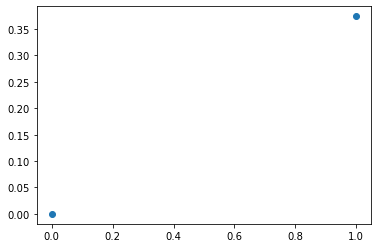

In [109]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sam_rate, hop_length=h_l) 
plt.scatter(frames,t)

In [110]:
sig = dict( 
    number=[bnb_range['Open'],bnb_range['High'],bnb_range['Low'],bnb_range['Close'],bnb_range['Volume']],
    stage=[ "Open", "High", "Low", "Close",'volume'])
fig = px.funnel(data, x=t, y=frames)
fig.show()

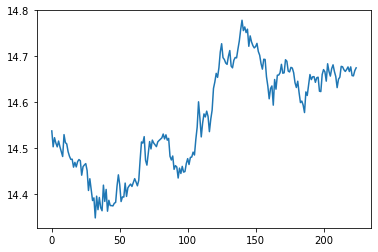

In [111]:
def strip(x, frame_length, hop_length):

    # Compute RMSE.
    rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
    
    # Identify the first frame index where RMSE exceeds a threshold.
    thresh = 0.01
    frame_index = 0
    while rmse[0][frame_index] < thresh:
        frame_index += 1
        
    # Convert units of frames to samples.
    start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
    
    # Return the trimmed signal.
    return x[start_sample_index:]
y = strip(reg.predict(X_test), f_l, h_l)
plt.plot(y)

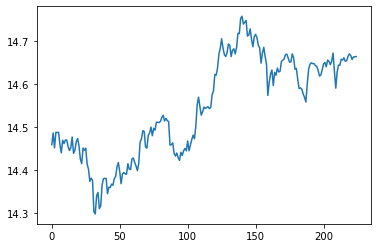

In [112]:
yl = strip(reg1.predict(Xl_test), f_l, h_l)
plt.plot(yl)

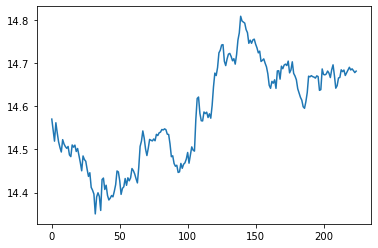

In [113]:
yh = strip(reg2.predict(Xh_test), f_l, h_l)
plt.plot(yh)

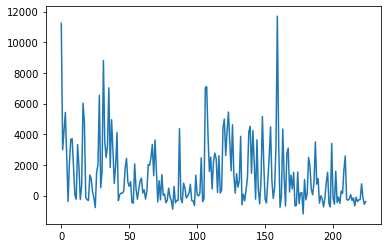

In [114]:
yv = strip(reg3.predict(Xv_test), f_l, h_l)
plt.plot(yv)

In [120]:
test_size = .12
data = dict(
    number=[first_iteration['timestamp']*test_size,[first_iteration['Volume']]],
    stage=[ "Open", "High", "Low", "Close",'Volume'])
fig = px.funnel(first_iteration, x=first_iteration['timestamp'][:225], y=reg3.predict(Xv_test)[:225],title='Sounds of BNB',labels=())

fig.show()
# fig.write_html("../DEPLOYED_APPS/Stock-Flasking/zrx_signal.html")

### Quik vol_sigs inspekts 

In [121]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate*.45]], y=[[yv_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min()*.45, sam_rate.max()*.45], autorange=False),
        yaxis=dict(range=[yv_test.min(),yv_test.max()], autorange=False),
        title="Locating Open Recieving Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:-1]], y=[[Xv_test[0:-1]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:-1]], y=[[Xv_test[10:-1]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:-1]], y=[[Xv_test[20:-1]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:-1]], y=[[Xv_test[27:-1]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:-1]], y=[[reg.predict(Xv_test[5:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:-1]], y=[[reg.predict(Xv_test[10:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:-1]], y=[[reg.predict(Xv_test[15:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:-1]], y=[[reg.predict(Xv_test[20:-1])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[196:-1]], y=[[Xv_test[196:-1]]])],
                     
                     
                     layout=go.Layout(title_text="End of Signals"))]
    
)


fig.show()

### TRANSMIT BUY SIGNAL

In [122]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate]], y=[[yl_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
        yaxis=dict(range=[yl_test.min(),yl_test.max()], autorange=True),
        title="Transmitting Buy Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xl_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xl_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xl_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xl_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg1.predict(X_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg1.predict(X_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg1.predict(X_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg1.predict(X_test[20:25])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[201:-1]], y=[[reg1.predict(Xl_test[25:-1])]])],
                     
                     
                     layout=go.Layout(title_text="End of Receiving Low Signal"))]
    
)


fig.show()
fig.write_html("filezrx.html")

In [123]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate]], y=[[yh_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
        yaxis=dict(range=[yh_test.min(),yh_test.max()], autorange=True),
        title="Transmitting  high,open,low Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[X_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[X_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[X_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[X_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xl_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xl_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xl_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xl_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xh_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xh_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xh_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xh_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg.predict(X_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg.predict(X_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg.predict(X_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg.predict(X_test[20:25])]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg1.predict(Xl_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg1.predict(Xl_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg1.predict(Xl_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg1.predict(Xl_test[20:25])]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg2.predict(Xh_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg2.predict(Xh_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg2.predict(Xh_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg2.predict(Xh_test[20:25])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[201:-1]], y=[[reg2.predict(Xh_test[25:-1])]])],
                     
                     
                     layout=go.Layout(title_text="End of Predicting All Received Signals based on high,open,low"))]
    
)


fig.show()
print('predicted market cap per signal {}'.format((reg.predict(X_test[0:10])*background[0:10])))
print('predicted market cap per signal {}'.format((reg.predict(X_test[10:20])*background[10:20])))
print('predicted market cap per signal {}'.format((reg.predict(X_test[20:27])*background[20:27]))) 
print('predicted market cap per signal {}'.format((reg.predict(X_test[27:29])*background[27:29])))
import os

if not os.path.exists("images"):
    os.mkdir("images")

reg2.predict(Xh_test[25:-1])
fig.write_html("../DEPLOYED_APPS/Stock-Flasking/high_low_open.html")

predicted market cap per signal 0    9948.013967
1    4403.833778
2    1597.704568
3     889.558776
4    7356.520198
5      17.564355
6    5650.797751
7    4716.817579
8    4482.295765
9    3345.216943
Name: Volume, dtype: float64
predicted market cap per signal 10    10650.198355
11       95.038474
12     2171.036971
13     2310.900691
14     3847.029452
15     5887.880704
16    12384.750967
17     6708.093922
18    13904.317161
19     3879.012895
Name: Volume, dtype: float64
predicted market cap per signal 20     8165.175195
21      315.947504
22      127.231559
23     4288.779521
24     4447.397963
25     5650.492547
26    12882.637066
Name: Volume, dtype: float64
predicted market cap per signal 27    8741.347390
28    1091.790331
Name: Volume, dtype: float64


In [124]:
reg.predict(X_test[25:-1])

array([14.46692751, 14.45165304, 14.40849771, 14.43403398, 14.41043627,
       14.3866174 , 14.3924007 , 14.34886425, 14.39614988, 14.36675342,
       14.39327569, 14.37100301, 14.36444306, 14.42010611, 14.3847386 ,
       14.41080607, 14.3634378 , 14.38712471, 14.37575373, 14.37558457,
       14.37498096, 14.38071683, 14.38261465, 14.41777319, 14.442492  ,
       14.42094968, 14.38445387, 14.39460002, 14.39419468, 14.4245954 ,
       14.39556606, 14.41425108, 14.41874361, 14.42241835, 14.41726656,
       14.42558382, 14.43420273, 14.42687906, 14.41864888, 14.43052105,
       14.47443832, 14.51391416, 14.51143362, 14.52551101, 14.47430281,
       14.46362669, 14.48865964, 14.51479298, 14.49880472, 14.51800563,
       14.51167009, 14.50760972, 14.50380567, 14.51416089, 14.517304  ,
       14.52004591, 14.52282147, 14.53118715, 14.52052446, 14.5294674 ,
       14.51786185, 14.5217388 , 14.4829442 , 14.47475836, 14.48343718,
       14.45449693, 14.4624917 , 14.4595024 , 14.43559067, 14.45

In [125]:
reg1.predict(Xl_test[25:-1])

array([14.45124496, 14.41442165, 14.40224311, 14.37430639, 14.38156198,
       14.37549556, 14.30305411, 14.29839741, 14.34130079, 14.34814471,
       14.31062919, 14.3168511 , 14.36502159, 14.3799809 , 14.38116356,
       14.38070097, 14.34532972, 14.36047828, 14.35977441, 14.36762024,
       14.36506404, 14.38071059, 14.3854873 , 14.40760477, 14.41779966,
       14.39666011, 14.36861346, 14.39090838, 14.3947246 , 14.39151827,
       14.39068161, 14.41516925, 14.40237623, 14.40156271, 14.42643426,
       14.42821741, 14.41801853, 14.40982362, 14.39904891, 14.41581287,
       14.46514805, 14.47266788, 14.49189604, 14.49000979, 14.45378163,
       14.45134902, 14.48058741, 14.48691184, 14.50036131, 14.48024354,
       14.49715758, 14.49333554, 14.51150879, 14.51144952, 14.51073514,
       14.51371585, 14.52277407, 14.52785102, 14.51432208, 14.52027957,
       14.51525963, 14.51300064, 14.45817759, 14.45963543, 14.46352009,
       14.43938665, 14.43293329, 14.43993207, 14.42923489, 14.42

(array([[1., 0., 1., 0., 1., 0., 1., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([14.459  , 14.46269, 14.46638, 14.47007, 14.47376, 14.47745,
        14.48114, 14.48483, 14.48852, 14.49221, 14.4959 ]),
 array([14.44043949, 14.44520059, 14.44996169, 14.45472278, 14.45948388,
        14.46424498, 14.46900608, 14.47376718, 14.47852828, 14.48328938,
        14.48805048]),
 <matplotlib.collections.QuadMesh at 0x22a4ad6ca08>)

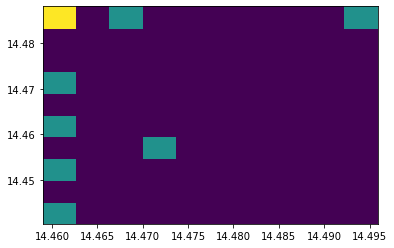

In [126]:
plt.hist2d(yl_test[0:9],reg1.predict(Xl_test[0:9]))

(array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 array([14.5113 , 14.51814, 14.52498, 14.53182, 14.53866, 14.5455 ,
        14.55234, 14.55918, 14.56602, 14.57286, 14.5797 ]),
 array([14.45965426, 14.46669591, 14.47373757, 14.48077923, 14.48782089,
        14.49486255, 14.50190421, 14.50894587, 14.51598752, 14.52302918,
        14.53007084]),
 <matplotlib.collections.QuadMesh at 0x22a44849c48>)

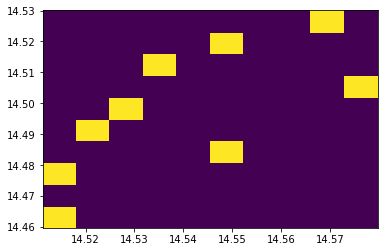

In [127]:
plt.hist2d(yh_test[0:9],reg1.predict(Xh_test[0:9]))

(array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([14.4704 , 14.48133, 14.49226, 14.50319, 14.51412, 14.52505,
        14.53598, 14.54691, 14.55784, 14.56877, 14.5797 ]),
 array([14.48237727, 14.48793243, 14.49348759, 14.49904275, 14.50459791,
        14.51015307, 14.51570823, 14.52126339, 14.52681855, 14.53237371,
        14.53792887]),
 <matplotlib.collections.QuadMesh at 0x22a44800d08>)

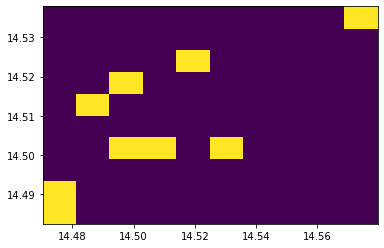

In [128]:
plt.hist2d(y_test[0:9],reg.predict(X_test[0:9]))

In [131]:
reg1.score(Xl_test,yl_test)

0.9203997034458367